<a href="https://colab.research.google.com/github/ychengbf/ECON441B/blob/main/lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.) Preprocess your data into scaled input variables and an output variable


In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/CLV.csv")

In [4]:
df.head()

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1


In [5]:
X = df.drop(["Unnamed: 0","Customer Lifetime Value"], axis =1 )
y = df['Customer Lifetime Value']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

In [10]:
MLPRegressor?

In [11]:
#hidden_layer_sizes is a tuple that specifies the number of neurons in each hidden layer of the neural network. 
#The first tuple has only one element, which means the neural network has one hidden layer with 10 neurons. 
#The second tuple has two elements, which means the neural network has two hidden layers with 20 and 5 neurons
#activation specifies the activation function used for the hidden layers.
#'relu' refers to the rectified linear unit activation function
#'logistic' refers to the sigmoid activation function
clf = MLPRegressor()

params = {
    "hidden_layer_sizes": [(10,), (20,5,)], 
    "activation" : ['relu','logistic']
}

In [12]:
# GridSearchCV takes the clf object (the MLPRegressor model) and the params dictionary (the hyperparameters to tune) as inputs.
# 5-fold cross-validation should be used to evaluate each combination of hyperparameters.
# the best hyperparameters are stored in the best_params_
grid = GridSearchCV(clf, params, cv = 5)
grid.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'logistic'],
                         'hidden_layer_sizes': [(10,), (20, 5)]})

In [13]:
print(grid.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': (20, 5)}


In [14]:
# the first hidden layer has 20 neurons and the second hidden layer has 5 neurons.

# 3.) Train a model with the optimal solution from GridSearch

In [15]:
model = MLPRegressor(**grid.best_params_)

In [16]:
#p_dict = {
#    "hidden_layer_sizes": (10,), 
#    "activation" : 'relu'
#}

#MLPRegressor(**p_dict)

#=======EQUIVALENT TO========

#MLPRegressor(hidden_layer_sizes = (10,), 
           #  activation = "relu")

In [17]:
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(20, 5))

# 4.) What are the in-sample and out of sample MSEs

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print("In-sample MSE: ", mse_train)

In-sample MSE:  43306683.43223249


In [20]:
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Out-of-sample MSE: ", mse_test)

Out-of-sample MSE:  44528079.763602376


# 5.) Build a Keras with the architecture defined by GridSearchCV

In [21]:
import keras.models
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense

In [22]:
model = Sequential()

In [23]:
best_params = grid.best_params_
best_params

{'activation': 'relu', 'hidden_layer_sizes': (20, 5)}

In [24]:
#model.add(Dense(units=best_params['hidden_layer_sizes'][0], activation=best_params['activation'], input_shape=(X_train.shape[1],)))
#for layer_size in best_params['hidden_layer_sizes'][1:]:
#    model.add(Dense(units=layer_size, activation=best_params['activation']))
#model.add(Dense(units=1))

In [25]:
model.add(Dense(10, activation='relu', input_dim=X_train.shape[1]))
print(model.output_shape)

(None, 10)


In [26]:
model.add(Dense(5, activation='relu'))
print(model.output_shape)

(None, 5)


In [27]:
model.add(Dense(1, activation='linear'))
print(model.output_shape)

(None, 1)


In [28]:
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.01))

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [29]:
print(X_train.shape)
print(X_test.shape)

(6393, 16)
(2741, 16)


In [30]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 111881056.0000
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 111848648.0000
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 111816808.0000
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 111784936.0000
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 111753136.0000
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 111721408.0000
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 111689632.0000
Epoch 8/100
200/200 [==============================] - 1s 4ms/step - loss: 111657976.0000
Epoch 9/100
200/200 [==============================] - 1s 7ms/step - loss: 111626200.0000
Epoch 10/100
200/200 [==============================] - 1s 6ms/step - loss: 111594544.0000
Epoch 11/100
200/200 [==============================] - 1s 6ms/step - loss: 111562824.0000
Epoch 12

# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [31]:
!pip install ann_visualizer
from keras.utils.vis_utils import plot_model
from ann_visualizer.visualize import ann_viz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=57d080c46a5ddcbad9a66fc9f571442c802f3b9852331f69995f2e0fa8a7ddd0
  Stored in directory: /root/.cache/pip/wheels/4b/ef/77/9b8c4ae2f9a11de19957b80bc5c684accd99114bb8dc6b374c
Successfully built ann_visualizer


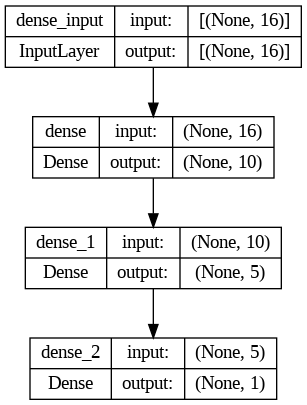

In [32]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [33]:
ann_viz(model, view=True, filename='model.html')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                170       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________
